Regression Problem with Neural Networks

##Creating data to view and fit

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.17.1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Create features
X = np.array([-7.0, -4.0, 4.0, 8.0,10.0,0.0])
Y = np.array([3.0, 6.0, 14.0, 18.0,20.0,10.0])

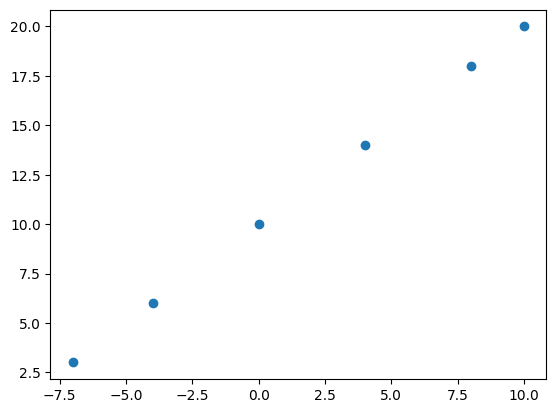

In [ ]:
plt.scatter(X,Y)

In [ ]:
X+10

array([ 3.,  6., 14., 18., 20., 10.])

In [ ]:
Y == X +10

array([ True,  True,  True,  True,  True,  True])

##This is what we should figure out

##Create demo sensor for housing price prediction

In [ ]:
house_info = tf.constant(["Bedroom","Bathroom", "Price"])
house_price = tf.constant([939400])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'Bedroom', b'Bathroom', b'Price'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939400], dtype=int32)>)

In [ ]:
X, Y

(array([-7., -4.,  4.,  8., 10.,  0.]), array([ 3.,  6., 14., 18., 20., 10.]))

In [ ]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

((6,), (6,))

In [ ]:
X[0],Y[0]
X[0].shape, Y[0].shape

((), ())

##We are trying to create a model that take input -7.0 and predict output as 3.0

###Turn our numpy arrays into tensors

In [ ]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
Y = tf.cast(tf.constant(Y), dtype=tf.float32)
X, Y


(<tf.Tensor: shape=(6,), dtype=float32, numpy=array([-7., -4.,  4.,  8., 10.,  0.], dtype=float32)>,
 <tf.Tensor: shape=(6,), dtype=float32, numpy=array([ 3.,  6., 14., 18., 20., 10.], dtype=float32)>)

In [ ]:
X, Y

(<tf.Tensor: shape=(6,), dtype=float32, numpy=array([-7., -4.,  4.,  8., 10.,  0.], dtype=float32)>,
 <tf.Tensor: shape=(6,), dtype=float32, numpy=array([ 3.,  6., 14., 18., 20., 10.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape


(TensorShape([]), TensorShape([]))

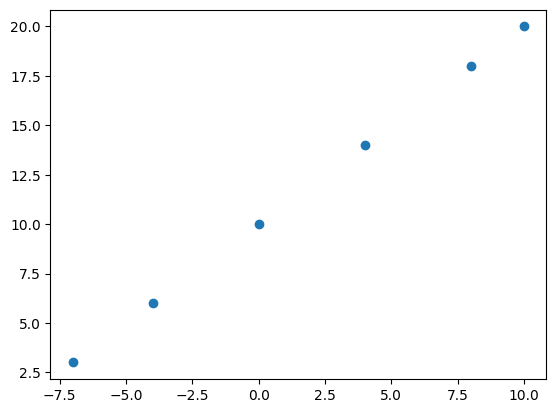

In [ ]:
plt.scatter(X,Y)

#Main Steps in Modelling with TensorFlow

### **1. Creating a model** - Define input, hidden, output layers

### **2. Compiling the model** - Define Loss function (in other words the function that tells us how wrong the model is, Optimizer (How to improve the patterns it learning) and evaluation metric  (What we can use to intepret the performance of our model)

### **3. Fitting the model** - Letting the model learn the patterns in X and Y (Features and labels)

In [ ]:
#Set Random seed

tf.random.set_seed(42)

# 1. Create a model using Sequential API

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile model

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(), #Stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 11.0888 - mae: 11.0888
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 11.0452 - mae: 11.0452
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 11.0016 - mae: 11.0016
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 10.9580 - mae: 10.9580
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 10.9144 - mae: 10.9144


In [ ]:
X, Y

(<tf.Tensor: shape=(6,), dtype=float32, numpy=array([-7., -4.,  4.,  8., 10.,  0.], dtype=float32)>,
 <tf.Tensor: shape=(6,), dtype=float32, numpy=array([ 3.,  6., 14., 18., 20., 10.], dtype=float32)>)

In [ ]:
input_value = tf.expand_dims(np.array([17.0], dtype=np.float32), axis=-1)
print("Input shape:", input_value.shape)

Input shape: (1, 1)


In [ ]:
y_pred = model.predict(input_value)
print("Prediction for input 17.0:", y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
Prediction for input 17.0: [[8.512228]]


###Improving the Model
#### We can improve by altering in above three ways
#### 1. Creating model -> add more layers/ increase no.of hidden units/ neurons, change activation function of each layer.
#### 2. Compiling the model -> here we may change the optimization function or pehaps the learning rate of optimization function
#### 3. Fiting the model -> fit model with more epochs or with more data.



In [ ]:
#Set Random seed

tf.random.set_seed(42)

# 1. Create a model using Sequential API

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile model

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), #Stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 10.4263 - mae: 10.4263
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 10.4260 - mae: 10.4260
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 10.4257 - mae: 10.4257
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 10.4254 - mae: 10.4254
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 10.4251 - mae: 10.4251
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 10.4248 - mae: 10.4248
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 10.4246 - mae: 10.4246
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 10.4243 - mae: 10.4243
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 10.4240 - mae: 10.4240
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 10.4237 - mae: 10.4237
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 10.4234 - mae: 10.4234
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.4231 - mae: 10.4231
Epoch 13/100
1/1 ━━━━━

In [ ]:
y_pred = model.predict(input_value)
print("Prediction for input 17.0:", y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction for input 17.0: [[13.22742]]


#### A big improvement. Almost equal

##Evaluating Model
###Typical Workflow
#### build a model -> fit -> evaluate -> tweak mode -> fit -> evaluate->tweak->...

When evaluating a mode, visualizing is important ->

Visualize data, visualize model, visualize training, visualize prediction

In [ ]:
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
import matplotlib.pyplot as plt


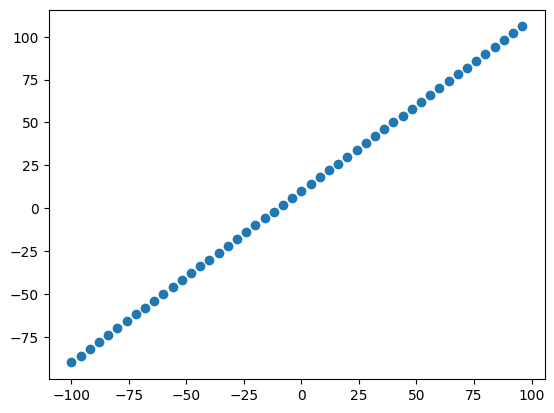

In [ ]:
plt.scatter(X,Y)

###The Three Sets
#### Split X and Y Training(70-80%), Validating(model gets tuned here 10-15%), Testing(10-15%)

In [ ]:
len(X)

50

In [ ]:
#split data
X_train = X[:40]
X_test = X[40:]

Y_train = Y[:40]
Y_test = Y[40:]

In [ ]:
len(X_train), len(X_test)

(40, 10)

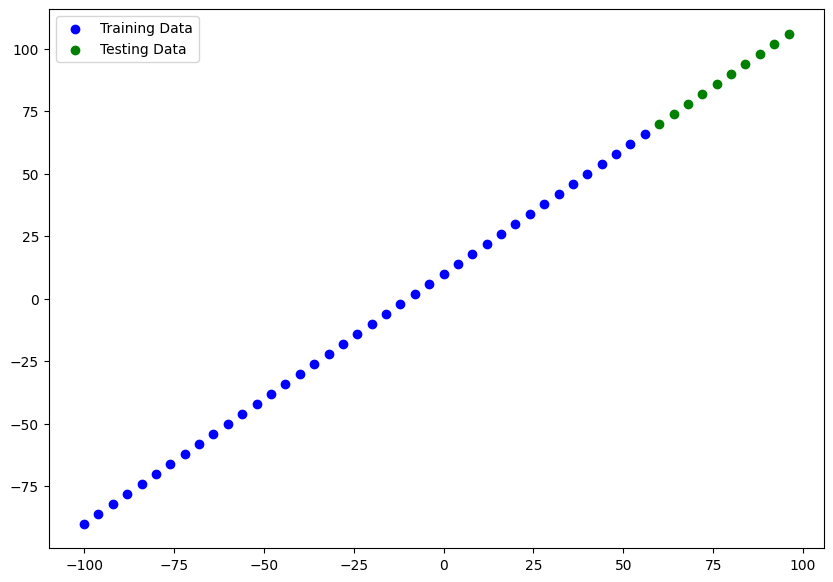

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, Y_train, c="b", label="Training Data")
plt.scatter(X_test, Y_test, c="g", label="Testing Data")
plt.legend()

In [ ]:
#How to build a neural network

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

In [ ]:
#Let's visualize before fitting
#But to visualize, we should have either build or fit the model
#Let's build the model automatically by Passing input shape as parameter

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 77.8939 - mae: 77.8939 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 42.8208 - mae: 42.8208 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.5957 - mae: 11.5957 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.8343 - mae: 7.8343 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.7082 - mae: 10.7082 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.6560 - mae: 7.6560 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.8713 - mae: 11.8713 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0059 - mae: 8.0059 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.6897 - mae: 9.6897 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.9880 - mae: 7.9880 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.6781 - mae: 9.6781 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9702 - mae: 7.9702 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

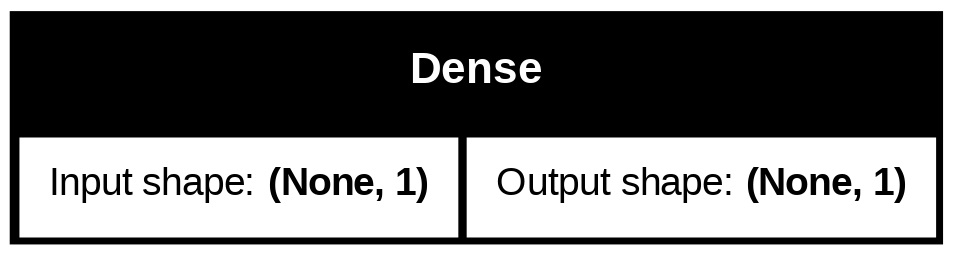

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [ ]:
y_preds=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


In [ ]:
y_preds

array([[ 63.178284],
       [ 67.2978  ],
       [ 71.417305],
       [ 75.53682 ],
       [ 79.656334],
       [ 83.77584 ],
       [ 87.89535 ],
       [ 92.01486 ],
       [ 96.13438 ],
       [100.25388 ]], dtype=float32)

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels= Y_train,
                     test_data = X_test,
                     test_labels = Y_test,
                     predictions = y_preds):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label="Training Data")
  plt.scatter(test_data, test_labels, c="g", label="Testing Data")
  plt.scatter(test_data,predictions, c='r', label = "Predictions")
  plt.legend();




In [ ]:
plot_predictions()